In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from RegressionModel import RegressionModel
from NeuralNetwork import NeuralNetwork
from FFNN import FFNN
from Scheduler import *
from functions import *

seed = 42

### Aims:
1. Change the cost function for the neural network code in order to perform a classification analysis on the Wisconsin Breast Cancer data set. Use the accuracy-score (see task d) description) to measure the performance of the classification problem.
2. Discuss the results and give a critical analysis of the various parameters, including hyper-parameters like the learning rates and the regularization parameter $\lambda$ (as you did in Ridge Regression), various activation functions, number of hidden layers and number of nodes per layer. Mainly make contourplots to do this.
3. If time, compare own code for classification and pertinent results against a similar code (scikit-Learn or tensorflow/keras or pytorch). Make a simple plot showing how accuracy scores change for example.
4. If even more time, try to study other datasets.

In [ ]:
#TODO what is the λ? is it the momentum parameter?

In [2]:
wisconsin = load_breast_cancer()
X = wisconsin.data
target = wisconsin.target
target = target.reshape(target.shape[0], 1)

X_train, X_val, t_train, t_val = train_test_split(X, target, random_state = seed)

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [3]:
input_nodes = X_train.shape[1]
output_nodes = 1

logistic_regression = FFNN((input_nodes, output_nodes), output_func = sigmoid, cost_func = CostLogReg, seed = seed)

In [4]:
logistic_regression.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta = 1e-3, rho = 0.9, rho2 = 0.999)
scores = logistic_regression.fit(X_train, t_train, scheduler, epochs = 1000, X_val = X_val, t_val = t_val)

Adam: Eta=0.001, Lambda=0
  [=======================================>] 100.0% | train_error: 2.14 | train_acc: 0.897 | val_error: 2.17 | val_acc: 0.895  

In [5]:
input_nodes = X_train.shape[1]
hidden_nodes1 = 100
hidden_nodes2 = 30
output_nodes = 1

dims = (input_nodes, hidden_nodes1, hidden_nodes2, output_nodes)

neural_network = FFNN(dims, hidden_func = ReLU, output_func = sigmoid, cost_func = CostLogReg, seed = seed)

In [6]:
neural_network.reset_weights() # reset weights such that previous runs or reruns don't affect the weights

scheduler = Adam(eta = 1e-4, rho = 0.9, rho2 = 0.999)
scores = neural_network.fit(X_train, t_train, scheduler, epochs = 1000, X_val = X_val, t_val = t_val)

Adam: Eta=0.0001, Lambda=0
  [=======================================>] 100.0% | train_error: 0.146 | train_acc: 0.993 | val_error: 1.16 | val_acc: 0.944 

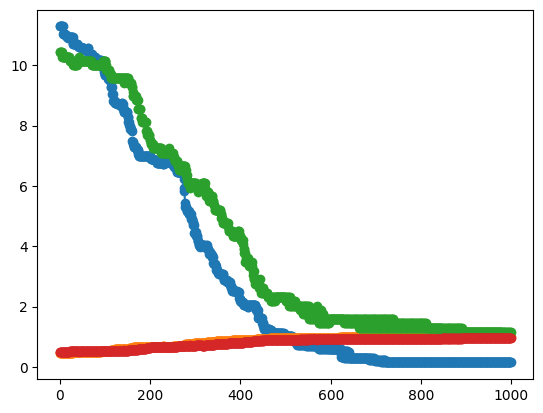

In [13]:
plt.plot(scores["train_errors"], "o--")
plt.plot(scores["train_accs"], "o--")
plt.plot(scores["val_errors"], "o--")
plt.plot(scores["val_accs"], "o--")